In [ ]:
# Import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


**Upload Images In .jpg form**

In [14]:
from google.colab import files
uploaded = files.upload()


Saving early.jpg to early.jpg


In [19]:
from google.colab import files
uploaded = files.upload()


Saving HEALTH.jpg to HEALTH.jpg


In [20]:
import os
print(os.listdir('/content'))


['.config', 'early.jpg', '.ipynb_checkpoints', 'LATE.jpg', 'HEALTH.jpg', 'sample_data']


**Load and PreProcess the images**

In [21]:
import cv2
import numpy as np


def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image {image_path}")
        return None
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    return img


early_img = load_and_preprocess_image('/content/early.jpg')
late_img = load_and_preprocess_image('/content/LATE.jpg')
healthy_img = load_and_preprocess_image('/content/HEALTH.jpg')

# Check if all images were loaded successfully
if early_img is not None and late_img is not None and healthy_img is not None:
    images = np.array([early_img, late_img, healthy_img])
    labels = ['early_blight', 'late_blight', 'healthy']
    print("Images loaded and preprocessed successfully!")
else:
    print("One or more images failed to load.")


Images loaded and preprocessed successfully!


In [22]:
images = np.array([early_img, late_img, healthy_img])
labels = ['early_blight', 'late_blight', 'healthy']

**Encode the labels**

In [23]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = to_categorical(labels_encoded)
print("Encoded labels:", labels_encoded)


Encoded labels: [0 2 1]


**Build CNN model**

In [24]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax')) y

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Train the model on the 3 images (with a small number of epochs)
model.fit(images, labels_one_hot, epochs=10)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 1.0966
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.3333 - loss: 2.1723
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.3333 - loss: 1.5390
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.6667 - loss: 0.9650
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 1.0000 - loss: 0.6134
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.0000e+00 - loss: 1.0131
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 1.0000 - loss: 0.7742
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 1.0000 - loss: 0.6501
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 1.0000 - loss: 0.4601
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 1.0000 - loss: 0.4321


**Prediction**

In [30]:
import cv2
import numpy as np

def load_and_preprocess_image(image_path):
    """Loads an image from the given path, preprocesses it, and returns it.
    """
    try:
        # Load the image using OpenCV
        img = cv2.imread(image_path)


        if img is None:
            print(f"Error: Could not load image at {image_path}")
            return None

        # Resize the image to the desired input size for the model
        img = cv2.resize(img, (128, 128))

        # Convert the image to float32 and normalize pixel values to [0, 1]
        img = img.astype(np.float32) / 255.0

        return img

    except Exception as e:
        print(f"Error during image loading and preprocessing: {e}")
        return None


import matplotlib.pyplot as plt

# Function to make predictions and show the image
def predict_image(model, image_path):
    img = load_and_preprocess_image(image_path)

    if img is None:  # Check if the image was loaded correctly
        return "Error: Could not load image"

    img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)


    class_label = ['early_blight', 'late_blight', 'healthy'][predicted_class]


    plt.imshow(img_display)
    plt.axis('off')  # Hide axes
    plt.title(f'Predicted label: {class_label}')
    plt.show()

    return predicted_class # Return the class label (e.g., 'early_blight')

**ShowCasing the Predicted image**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


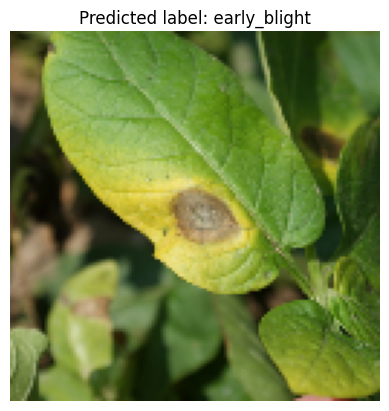

Predicted label: 0


In [31]:
# Test the model by predicting on one of the images
predicted_label = predict_image(model, '/content/early.jpg')  # Make sure the path is correct
print(f'Predicted label: {predicted_label}')


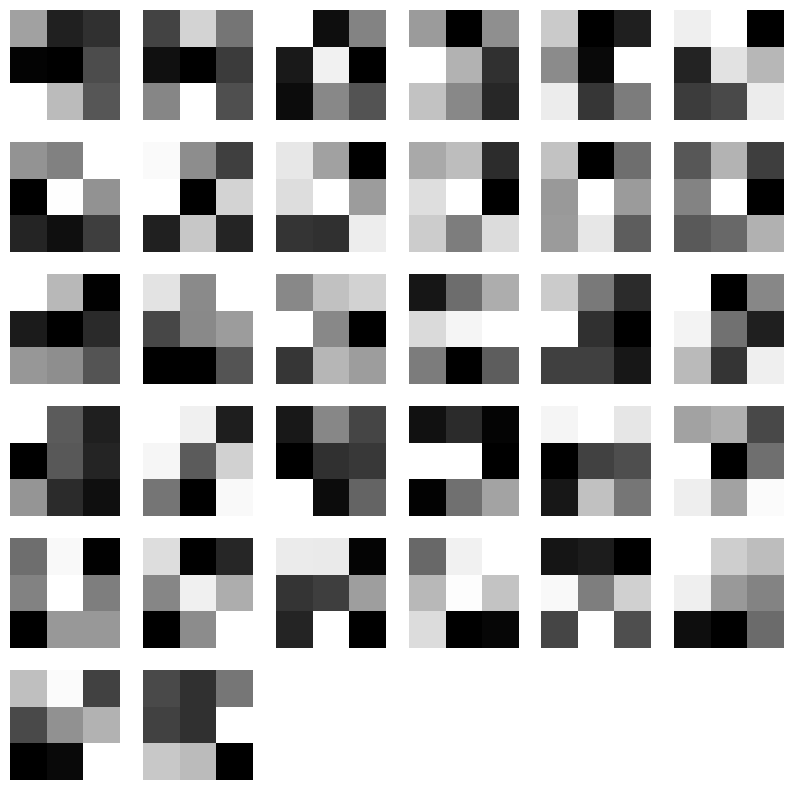

In [36]:
# Visualize the filters from the first convolutional layer
filters, biases = model.layers[0].get_weights()
n_filters = filters.shape[-1]

plt.figure(figsize=(10, 10))
for i in range(n_filters):
    f = filters[:, :, :, i]
    plt.subplot(6, 6, i+1)
    plt.imshow(f[:, :, 0], cmap='gray')
    plt.axis('off')
plt.show()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.6667 - loss: 0.6304
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 1.0000 - loss: 0.2042
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 1.0000 - loss: 0.1569
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 1.0000 - loss: 0.2125
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 1.0000 - loss: 0.1401
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.6667 - loss: 0.3359
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 1.0000 - loss: 0.0193
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 1.0000 - loss: 0.0492
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 1.0000 - loss: 0.0350
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step - accuracy: 1.0000 - loss: 0.0593


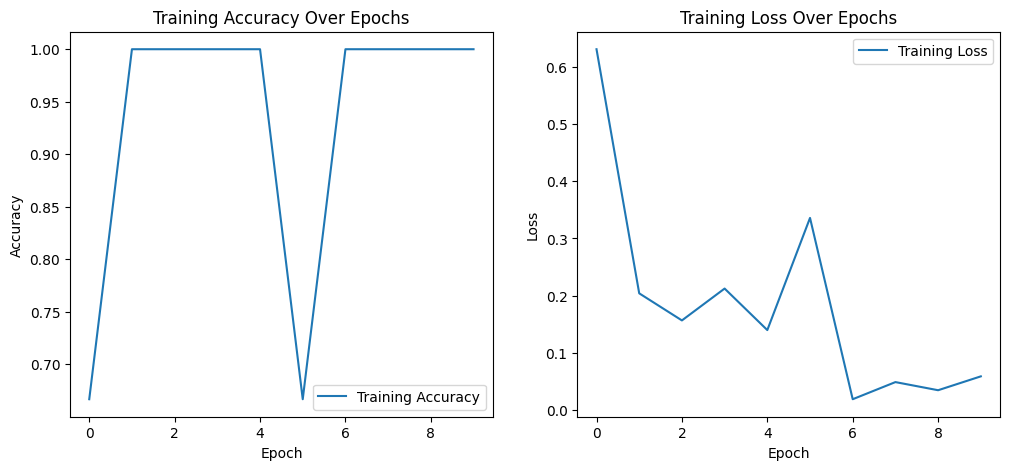

In [34]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot training accuracy and loss
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.title('Training Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Display the plots
    plt.show()

# Assuming 'model', 'images', and 'labels_one_hot' are defined
# Train the model and store the training history
history = model.fit(images, labels_one_hot, epochs=10)  # Assign the result to 'history'

# Call the function to plot the training history
plot_training_history(history) # Now 'history' is defined and can be passed to the function


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 5.4835e-05
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 2.6345e-05
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 1.0000 - val_loss: 1.2278e-05
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 1.0000 - loss: 0.0192 - val_accuracy: 1.0000 - val_loss: 5.0068e-06
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 2.3842e-06
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 1.0000 - loss: 5.1203e-04 - val_accuracy: 1.0000 - val_loss: 1.3113e-06
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 7.1526e-07
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 1.0000 - loss: 4.4503e-0

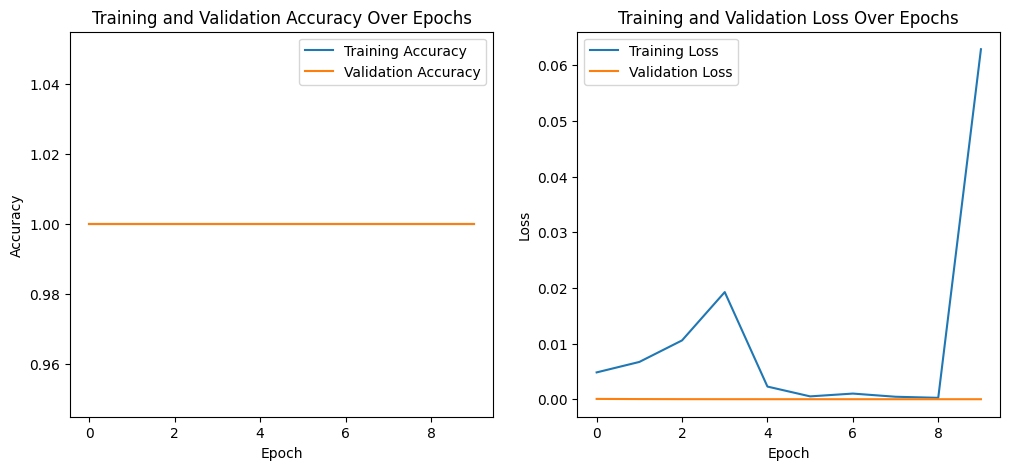

In [35]:
import matplotlib.pyplot as plt


def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')


    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

    plt.title('Training and Validation Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')

    # Check if 'val_loss' is in the history (for validation data)
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')

    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Display the plots
    plt.show()

# Assuming 'model', 'images', and 'labels_one_hot' are defined
# Train the model and store the training history
# Include validation data using 'validation_split' or 'validation_data' in model.fit
history = model.fit(images, labels_one_hot, epochs=10, validation_split=0.2)  # Example with validation_split

# Call the function to plot the training history
plot_training_history(history)

**Conclusion**

# Okay, let's discuss the scenario where my training and validation accuracy plots are straight lines at y=1. This indicates that my model is achieving 100% accuracy on both the training and validation sets very quickly (likely within the first few epochs).